In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

## Importing airline passenger dataset into dataframe

In [4]:
ls ../Data

ls: ../Data: No such file or directory


In [7]:
df=pd.read_csv('Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df.index.freq='MS'
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
Thousands of Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


## Performing Test Train Split

In [11]:
train_data = df.iloc[:108]
test_data = df.iloc[108:]

In [13]:
144-108

36

## Fitting the model

In [12]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

## Making predictions and Evaluating against the test data set

In [14]:
test_predictions = fitted_model.forecast(36).rename('Forecast')

In [18]:
test_predictions

1958-01-01    356.738900
1958-02-01    343.560934
1958-03-01    403.996376
1958-04-01    397.853033
1958-05-01    406.415331
1958-06-01    479.823604
1958-07-01    529.819433
1958-08-01    524.771027
1958-09-01    454.713965
1958-10-01    391.964558
1958-11-01    345.258808
1958-12-01    395.242629
1959-01-01    407.505101
1959-02-01    392.451827
1959-03-01    461.487614
1959-04-01    454.470035
1959-05-01    464.250803
1959-06-01    548.105537
1959-07-01    605.216088
1959-08-01    599.449263
1959-09-01    519.422637
1959-10-01    447.743593
1959-11-01    394.391320
1959-12-01    451.488154
1960-01-01    465.495653
1960-02-01    448.300203
1960-03-01    527.160220
1960-04-01    519.143995
1960-05-01    530.316627
1960-06-01    626.104421
1960-07-01    691.342165
1960-08-01    684.754683
1960-09-01    593.339763
1960-10-01    511.460337
1960-11-01    450.515698
1960-12-01    515.737773
Freq: MS, Name: Forecast, dtype: float64

## Plotting to check the fitment

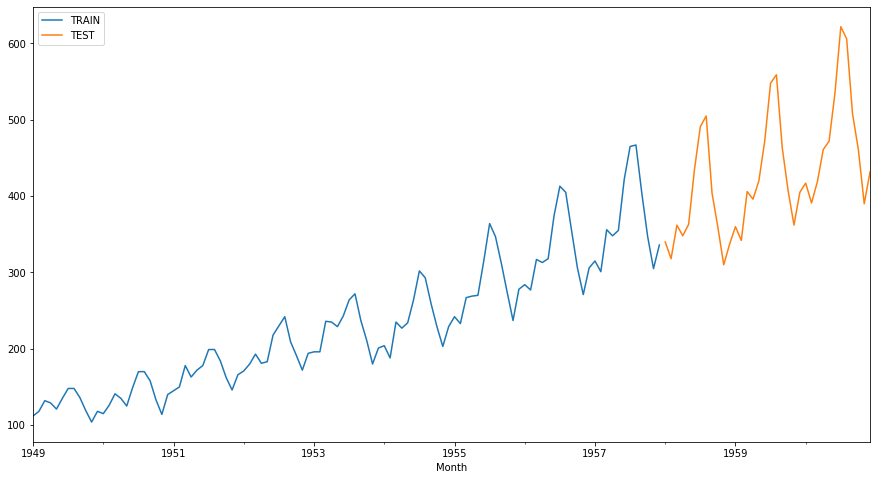

In [23]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN',figsize=(15,8))
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(15,8));

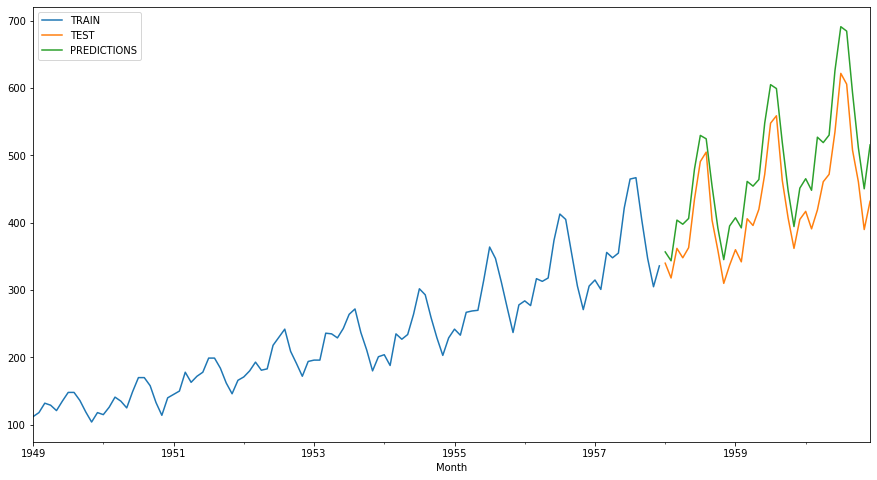

In [25]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN',figsize=(15,8))
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(15,8))
test_predictions.plot(legend=True,label='PREDICTIONS',figsize=(15,8));

## Evaluation

In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [27]:
mean_absolute_error(test_data,test_predictions)

53.16144739948977

In [28]:
mean_squared_error(test_data,test_predictions)

3200.31480957455

In [29]:
np.sqrt(mean_squared_error(test_data,test_predictions))

56.571324976303586

In [30]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


## Forecasting into future

In [31]:
final_model=ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [32]:
forecast = final_model.forecast(36)

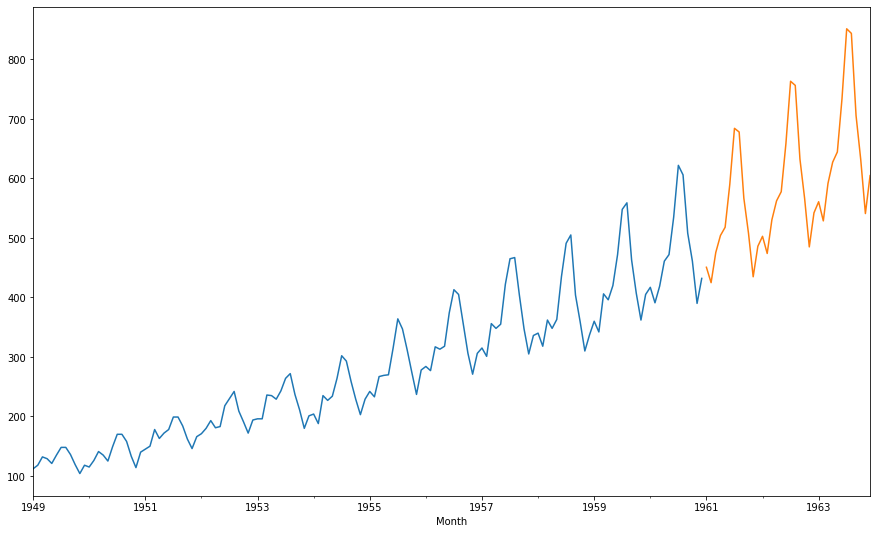

In [33]:
df['Thousands of Passengers'].plot(figsize=(15,9))
forecast.plot();